 <h1><center><b><td>Book Recommender System</td></b></center></h1>

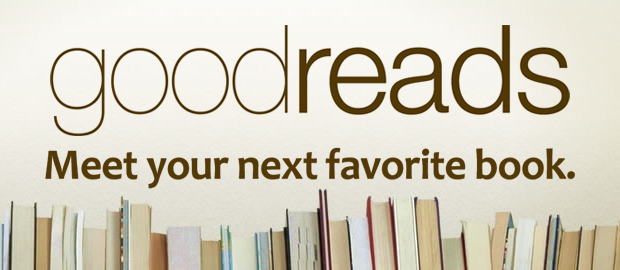

**Recommender System** - A recommender system, also known as a recommendation system, is a type of information filtering system that seeks to predict the preferences or ratings a user might give to a particular item. These systems are widely used in various applications to enhance user experience by suggesting items that are likely to be of interest to the user.

A **book recommender system** is a specialized type of recommender system designed to suggest books to users based on various criteria. These systems aim to help users discover new books that align with their tastes and preferences, improving their reading experience. 

### Dataset for book recommender system
The dataset utilized for the book recommendation system originates from Goodreads and covers the period of May 2024.

**Goodreads** is a social cataloging website designed for book lovers. It provides a platform for users to search for books, read and write reviews, rate books, and keep track of their reading progress. Goodreads also offers features for social interaction, such as joining book clubs, participating in reading challenges, and following authors or other readers.

### Importing libraries

In [1]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# for detecting language of string
from langdetect import detect

# for data cleaning and vectorization
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# for distance calculation
from sklearn.metrics.pairwise import cosine_similarity

### Loading and reading the data

In [2]:
books_data = pd.read_csv('Book_Details.csv')
books_data.head()

,Unnamed: 0,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_distribution
0,0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8..."
1,1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2..."
2,2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"['309 pages, Hardcover']","['First published June 26, 1997']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['309'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47,"{'5': '6,544,542', '4': '2,348,390', '3': '856..."
3,3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","['435 pages, Mass Market Paperback']","['First published July 8, 1999']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['435'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58,"{'5': '2,892,322', '4': '970,190', '3': '287,7..."
4,4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"['734 pages, Paperback']","['First published July 8, 2000']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['734'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57,"{'5': '2,500,070', '4': '899,496', '3': '259,7..."


### Shape of the dataset

In [3]:
shape = books_data.shape
print(f'There are {shape[0]} rows and {shape[1]} columns in the dataset')

There are 16225 rows and 15 columns in the dataset


### Attributes of the dataset

In [4]:
cols = list(books_data.columns)
n_col = len(cols)

print(f'There are total {n_col} columns- {cols}')

There are total 15 columns- ['Unnamed: 0', 'book_id', 'cover_image_uri', 'book_title', 'book_details', 'format', 'publication_info', 'authorlink', 'author', 'num_pages', 'genres', 'num_ratings', 'num_reviews', 'average_rating', 'rating_distribution']


### Basic information about the dataset

In [5]:
print(books_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16225 non-null  int64  
 1   book_id              16225 non-null  int64  
 2   cover_image_uri      16225 non-null  object 
 3   book_title           16225 non-null  object 
 4   book_details         16177 non-null  object 
 5   format               16225 non-null  object 
 6   publication_info     16225 non-null  object 
 7   authorlink           16225 non-null  object 
 8   author               16225 non-null  object 
 9   num_pages            16225 non-null  object 
 10  genres               16225 non-null  object 
 11  num_ratings          16225 non-null  int64  
 12  num_reviews          16225 non-null  int64  
 13  average_rating       16225 non-null  float64
 14  rating_distribution  16225 non-null  object 
dtypes: float64(1), int64(4), object(10)


### Statistical summary

In [6]:
# Summary of numeric columns
books_data.describe(include='object')

,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,rating_distribution
count,16225,16225,16177,16225,16225,16225,16225,16225,16225,16225
unique,16120,15491,16018,3104,5369,7615,7615,1083,13773,16093
top,https://dryofg8nmyqjw.cloudfront.net/images/no...,The Cheat Code,"Libro usado en buenas condiciones, por su anti...","['288 pages, Paperback']","['First published January 1, 2008']",https://www.goodreads.com/author/show/3389.Ste...,Stephen King,[None],[],"{'5': '0', '4': '0', '3': '0', '2': '0', '1': ..."
freq,38,7,6,142,360,79,79,274,325,12


In [7]:
# Summary of object columns
books_data.describe(include='object')

,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,rating_distribution
count,16225,16225,16177,16225,16225,16225,16225,16225,16225,16225
unique,16120,15491,16018,3104,5369,7615,7615,1083,13773,16093
top,https://dryofg8nmyqjw.cloudfront.net/images/no...,The Cheat Code,"Libro usado en buenas condiciones, por su anti...","['288 pages, Paperback']","['First published January 1, 2008']",https://www.goodreads.com/author/show/3389.Ste...,Stephen King,[None],[],"{'5': '0', '4': '0', '3': '0', '2': '0', '1': ..."
freq,38,7,6,142,360,79,79,274,325,12


<h1><center><b><td>Data Preprocessing</td></b></center></h1>

### 1. Checking missing values

In [8]:
books_data.isna().sum()

Unnamed: 0              0
book_id                 0
cover_image_uri         0
book_title              0
book_details           48
format                  0
publication_info        0
authorlink              0
author                  0
num_pages               0
genres                  0
num_ratings             0
num_reviews             0
average_rating          0
rating_distribution     0
dtype: int64

In [9]:
# There are missing values in just one column- book_details

### 2. Removing Missing values

In [10]:
# As the missing values are present in book_details(string), it's difficult to impute them in any way.
# Therefore, it's better to get rid of them.

In [11]:
books_data = books_data.dropna(subset = 'book_details')

In [12]:
# Verifying missing values
books_data.isna().sum()

Unnamed: 0             0
book_id                0
cover_image_uri        0
book_title             0
book_details           0
format                 0
publication_info       0
authorlink             0
author                 0
num_pages              0
genres                 0
num_ratings            0
num_reviews            0
average_rating         0
rating_distribution    0
dtype: int64

### 3. Checking duplicates in Book Title column

In [13]:
# As the core column of book recommender system is "book_title". Therfore, it shouldn't have any duplicate values.

books_data.duplicated(subset='book_title').sum()

734

### 4. Removing duplicates

In [14]:
# We should get rid of these duplicate rows

books_data = books_data.drop_duplicates(subset='book_title')

In [15]:
# Verifying duplicates
books_data.duplicated(subset='book_title').sum()

0

### Renaming columns

In [16]:
# In order to ensure better readability, it is preferred to rename inconsistent column names.

books_data = books_data.rename(columns = {"cover_image_uri": "image_url","book_title": "title", 
                                          "book_details" : "description", "genres": "genre"})

In [17]:
books_data.head(2)

,Unnamed: 0,book_id,image_url,title,description,format,publication_info,authorlink,author,num_pages,genre,num_ratings,num_reviews,average_rating,rating_distribution
0,0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8..."
1,1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2..."


### Shape of cleaned dataset

In [18]:
shape = books_data.shape
print(f'There are {shape[0]} rows and {shape[1]} columns in the dataset')

There are 15443 rows and 15 columns in the dataset


<h1><center><b><td>Exploratory Data Analysis</td></b></center></h1>

#### Top 10 frequent Genres

In [19]:
top_10_genres = books_data['genre'].value_counts()[1:10]
genre_df=pd.DataFrame(top_10_genres).reset_index().rename(columns= {"index":'genre', "genre": 'frequency'})

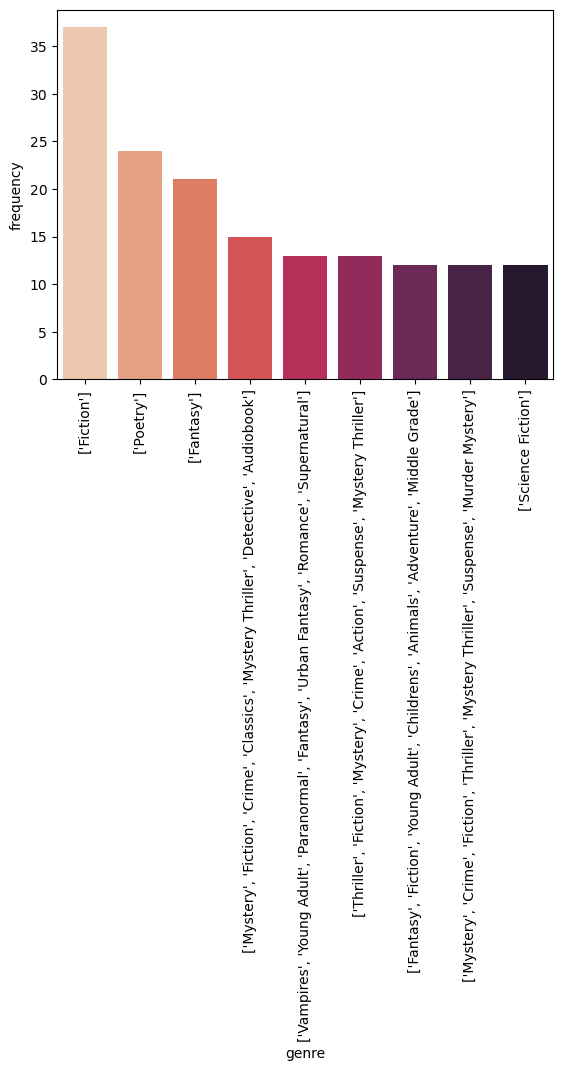

In [20]:
sns.barplot(x = 'genre', y = 'frequency', data = genre_df, palette = 'rocket_r')
plt.xticks(rotation=90)
plt.show()

### Top 10 Authors with highest number of books

In [21]:
top_10_authors = books_data['author'].value_counts()[:10]
adf=pd.DataFrame(top_10_authors).reset_index().rename(columns= {"index":'Author', "author": 'Frequency'})

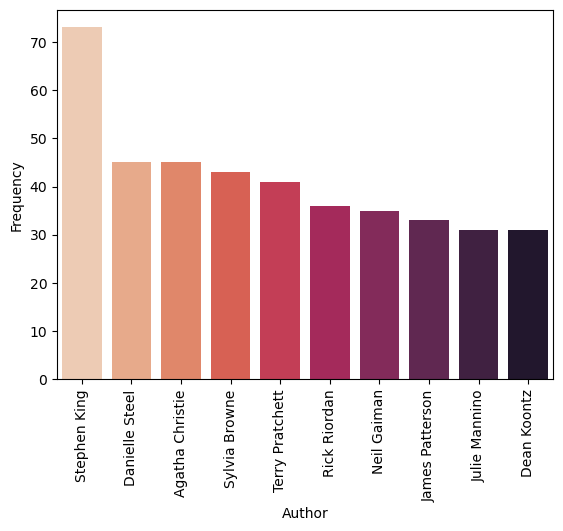

In [22]:
sns.barplot(x = 'Author', y = 'Frequency', data = adf, palette = 'rocket_r')
plt.xticks(rotation=90)
plt.show()

### Checking unique values of each column to ensure consistency of data

In [23]:
# Number of unique values in each column
books_data.nunique()

Unnamed: 0             15443
book_id                15443
image_url              15420
title                  15443
description            15418
format                  3034
publication_info        5266
authorlink              7494
author                  7494
num_pages               1076
genre                  13509
num_ratings            12503
num_reviews             6146
average_rating           264
rating_distribution    15365
dtype: int64

###  Defining a function to list all the unique values of a column

In [24]:
def unique_values(col):
    values = list(books_data[col].unique())
    return values

### 1. title column

In [25]:
print(unique_values('title'))

['Harry Potter and the Half-Blood Prince', 'Harry Potter and the Order of the Phoenix', "Harry Potter and the Sorcerer's Stone", 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Goblet of Fire', 'Harry Potter Boxed Set, Books 1-5', 'Harry Potter Collection', 'The Hitchhiker’s Guide to the Galaxy', 'The Ultimate Hitchhiker’s Guide to the Galaxy', 'A Short History of Nearly Everything', 'In a Sunburned Country', "I'm a Stranger Here Myself: Notes on Returning to America After Twenty Years Away", 'The Lost Continent: Travels in Small-Town America', 'Neither Here nor There: Travels in Europe', 'Notes from a Small Island', 'The Mother Tongue: English and How It Got That Way', 'J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings', 'The Lord of the Rings', 'The Fellowship of the Ring', 'Hatchet', 'Changeling', 'The Changeling', 'The Known World', 'Coming Into the Country', 'Heidi', 'Chapterhouse: Dune', 'Children of Dune', 'Heretics of Dune', 'The Power of O

### 2. description column

In [26]:
unique_values('description')

["It is the middle of the summer, but there is an unseasonal mist pressing against the windowpanes. Harry Potter is waiting nervously in his bedroom at the Dursleys' house in Privet Drive for a visit from Professor Dumbledore himself. One of the last times he saw the Headmaster, he was in a fierce one-to-one duel with Lord Voldemort, and Harry can't quite believe that Professor Dumbledore will actually appear at the Dursleys' of all places. Why is the Professor coming to visit him now? What is it that cannot wait until Harry returns to Hogwarts in a few weeks' time? Harry's sixth year at Hogwarts has already got off to an unusual start, as the worlds of Muggle and magic start to intertwine...",
 'Harry Potter is about to start his fifth year at Hogwarts School of Witchcraft and Wizardry. Unlike most schoolboys, Harry never enjoys his summer holidays, but this summer is even worse than usual. The Dursleys, of course, are making his life a misery, but even his best friends, Ron and Hermi

### 3. genre column

In [27]:
print(unique_values('genre'))

["['Fantasy', 'Young Adult', 'Fiction', 'Magic', 'Childrens', 'Audiobook', 'Adventure']", "['Young Adult', 'Fiction', 'Magic', 'Childrens', 'Audiobook', 'Adventure', 'Middle Grade']", "['Fantasy', 'Fiction', 'Young Adult', 'Magic', 'Childrens', 'Middle Grade', 'Audiobook']", "['Fantasy', 'Young Adult', 'Fiction', 'Magic', 'Childrens', 'Audiobook', 'Middle Grade']", "['Fantasy', 'Young Adult', 'Fiction', 'Magic', 'Adventure', 'Supernatural', 'Childrens']", "['Fantasy', 'Fiction', 'Young Adult', 'Magic', 'Childrens', 'Classics', 'Adventure']", "['Science Fiction', 'Fiction', 'Humor', 'Fantasy', 'Comedy', 'Audiobook', 'Science Fiction Fantasy']", "['Science Fiction', 'Fiction', 'Humor', 'Fantasy', 'Classics', 'Comedy', 'Science Fiction Fantasy']", "['Nonfiction', 'Science', 'History', 'Audiobook', 'Humor', 'Physics', 'Historical']", "['Travel', 'Nonfiction', 'Humor', 'Australia', 'Memoir', 'Audiobook', 'History']", "['Nonfiction', 'Travel', 'Humor', 'Memoir', 'Essays', 'Biography', 'Audio

### 4. author column

In [28]:
print(unique_values('author'))

['J.K. Rowling', 'Douglas Adams', 'Bill Bryson', 'J.R.R. Tolkien', 'Gary Paulsen', 'Delia Sherman', 'Zilpha Keatley Snyder', 'Edward P. Jones', 'John McPhee', 'Johanna Spyri', 'Frank Herbert', 'Bryce Courtenay', 'George Smoot', 'Tom Wolfe', 'Henry Miller', 'Henry James', 'Marguerite Duras', 'Kahlil Gibran', 'Robert Louis Stevenson', 'George Eliot', 'Gabriel García Márquez', 'Patrick Süskind', 'Robert A. Heinlein', 'Norton Juster', 'Don DeLillo', 'Thomas Pynchon', 'Joan Didion', 'Paul Auster', 'Jared Diamond', 'Robert D. Putnam', 'Nikola Tesla', 'Chuck Klosterman', 'Robert M. Pirsig', 'Naomi Klein', 'Leo Tolstoy', 'Ayn Rand', 'Billy Collins', 'Kevin Trudeau', 'Bernard Malamud', 'Anne Tyler', 'Philip Roth', 'Jon   Stewart', 'Jon Stewart', 'Buzz Bissinger', 'Neal Stephenson', 'Donald A. Norman', 'Paulo Coelho', 'Hiromu Arakawa', 'John Steinbeck', 'Ellen Raskin', 'Arthur Golden', 'Dan       Brown', 'Thomas J. Stanley', 'Donald J. Trump', 'George S. Clason', 'Trevanian', 'David McCullough',

### 5. num_ratings

In [29]:
print(unique_values('num_ratings'))

[3292516, 3401709, 10116247, 4215031, 3718209, 148443, 32990, 1849362, 323845, 387803, 112464, 66863, 61418, 74848, 113014, 41853, 134077, 678852, 2819586, 395109, 1085, 1510, 41387, 7126, 199998, 68582, 192872, 83194, 89204, 1251, 27754, 72611, 20244, 9573, 3337, 80791, 57278, 24593, 491967, 25830, 976523, 472039, 26657, 313396, 8749, 35744, 18194, 86445, 29601, 140698, 287770, 17873, 12000, 4564, 9570, 11363, 44293, 39600, 5401, 67922, 3515, 68175, 75329, 28568, 25487, 15202, 10624, 18776, 71503, 7429, 10880, 27967, 71223, 231128, 31413, 329772, 4455, 390964, 14340, 156299, 29442, 13939, 1938, 407, 11666, 22503, 61408, 95961, 9953, 8446, 87778, 8297, 112423, 24193, 42064, 19785, 90116, 281078, 42944, 3078682, 23022, 167491, 2559548, 214103, 2006566, 3204796, 2360320, 671296, 115103, 2142, 21043, 2867, 396, 202267, 17901, 145, 230852, 250286, 205761, 373239, 96712, 21779, 853477, 639421, 253627, 190428, 267968, 132187, 158218, 38686, 104054, 51817, 458521, 76215, 1086314, 957747, 9410

### Observations:

#### 1. genre column- empty list

In [30]:
# There is one [] empty value which has been repeated multiple times and it's better to get rid of them.

books_data = books_data[books_data['genre'] != "[]"]

#### 2. title and description column- Non-English languages

In [31]:
# As we can observe from unique values, there are some books which are not in English. We have to analyze this more.

#### Detecting languages of each book title

In [32]:
# Function to detect language of each book description

def detect_language(description):
    try:
        lang = detect(description)
        return lang
    except:
        return 'Unknown'

In [33]:
# Adding new col which detects language of each description

books_data['language'] = books_data['description'].apply(detect_language)

In [34]:
books_data.head(2)

,Unnamed: 0,book_id,image_url,title,description,format,publication_info,authorlink,author,num_pages,genre,num_ratings,num_reviews,average_rating,rating_distribution,language
0,0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",en
1,1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",en


In [35]:
# Most of the values are in English

books_data['language'].value_counts()

en         14411
es           125
ar           107
fr            94
de            71
id            37
pt            36
it            30
el            30
nl            24
pl            23
tr            16
uk            14
sv            13
af            12
no            11
ro            10
et            10
ru            10
fa             9
hr             7
ja             6
bg             5
da             4
hu             4
ta             4
fi             3
ca             3
tl             2
ml             2
sl             2
lt             2
zh-cn          2
sw             1
ur             1
Unknown        1
he             1
vi             1
ko             1
bn             1
Name: language, dtype: int64

In [36]:
# In order to build efficient and consistent recommendation system, it is better to get rid of rows with Non-English 
# Book Description.

books_data = books_data[books_data['language'] == 'en']

### Shape of final dataset

In [37]:
shape = books_data.shape
print(f'There are {shape[0]} rows and {shape[1]} columns in the dataset')

There are 14411 rows and 16 columns in the dataset


### Feature selection 

In [38]:
df = books_data[["book_id", "image_url", "title", "description", "author", "genre", "num_ratings", "average_rating"]]

In [39]:
df.head()

,book_id,image_url,title,description,author,genre,num_ratings,average_rating
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,4.58
1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,J.K. Rowling,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,4.50
2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,4.47
3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...",J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,4.58
4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,4.57


<h1><center><b><td>Content Based Filtering</td></b></center></h1>

Content-based filtering is a recommendation technique that suggests items (e.g., books, movies, products) to a user based on the similarity between the content or characteristics of the items and the user's preferences or past interactions.

In the context of book recommendations, content-based filtering analyzes the features or attributes of the books, such as genre, author, description, and other metadata, to identify books that are similar to the ones the user has previously liked or interacted with.

In this project, I am going to build Content-based recommendation system based on 3 Columns: description, genre and author.

In [40]:
df.head(2)

,book_id,image_url,title,description,author,genre,num_ratings,average_rating
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,4.58
1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,J.K. Rowling,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,4.50


## Text Preprocessing

The goal of text preprocessing is to clean and transform the raw text data into a suitable format for further analysis and modeling.

In [41]:
# 1. Removing White Spaces

def remove_white_space(col):
    cleaned_column = col.replace(" ", "")
    return cleaned_column

In [42]:
# Applying above function on required columns

df['author'] = df['author'].apply(remove_white_space)
df['genre'] = df['genre'].apply(remove_white_space)

In [43]:
df.head(2)

,book_id,image_url,title,description,author,genre,num_ratings,average_rating
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",J.K.Rowling,"['Fantasy','YoungAdult','Fiction','Magic','Chi...",3292516,4.58
1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,J.K.Rowling,"['YoungAdult','Fiction','Magic','Childrens','A...",3401709,4.50


####  Conversion of string to list - description, author, and genre column

In [44]:
# description
df['description'] = df['description'].apply(lambda x:x.split())
# author
df['author'] = df['author'].apply(lambda x:x.split())

In [45]:
# genre columns contains string representations of lists. The easiest way to extract only list from the row is as:
import ast

def convert_to_list(s):
    return ast.literal_eval(s)

In [46]:
df['genre'] = df['genre'].apply(convert_to_list)

In [47]:
df.head()

,book_id,image_url,title,description,author,genre,num_ratings,average_rating
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"[It, is, the, middle, of, the, summer,, but, t...",[J.K.Rowling],"[Fantasy, YoungAdult, Fiction, Magic, Children...",3292516,4.58
1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,"[Harry, Potter, is, about, to, start, his, fif...",[J.K.Rowling],"[YoungAdult, Fiction, Magic, Childrens, Audiob...",3401709,4.50
2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,"[Harry, Potter, has, no, idea, how, famous, he...",[J.K.Rowling],"[Fantasy, Fiction, YoungAdult, Magic, Children...",10116247,4.47
3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"[Harry, Potter,, along, with, his, best, frien...",[J.K.Rowling],"[Fantasy, Fiction, YoungAdult, Magic, Children...",4215031,4.58
4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,"[It, is, the, summer, holidays, and, soon, Har...",[J.K.Rowling],"[Fantasy, YoungAdult, Fiction, Magic, Children...",3718209,4.57


### Combining features

In [48]:
df['tags'] = df['description'] + df['author'] + df['genre'] 

In [49]:
df.head()

,book_id,image_url,title,description,author,genre,num_ratings,average_rating,tags
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"[It, is, the, middle, of, the, summer,, but, t...",[J.K.Rowling],"[Fantasy, YoungAdult, Fiction, Magic, Children...",3292516,4.58,"[It, is, the, middle, of, the, summer,, but, t..."
1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,"[Harry, Potter, is, about, to, start, his, fif...",[J.K.Rowling],"[YoungAdult, Fiction, Magic, Childrens, Audiob...",3401709,4.50,"[Harry, Potter, is, about, to, start, his, fif..."
2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,"[Harry, Potter, has, no, idea, how, famous, he...",[J.K.Rowling],"[Fantasy, Fiction, YoungAdult, Magic, Children...",10116247,4.47,"[Harry, Potter, has, no, idea, how, famous, he..."
3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"[Harry, Potter,, along, with, his, best, frien...",[J.K.Rowling],"[Fantasy, Fiction, YoungAdult, Magic, Children...",4215031,4.58,"[Harry, Potter,, along, with, his, best, frien..."
4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,"[It, is, the, summer, holidays, and, soon, Har...",[J.K.Rowling],"[Fantasy, YoungAdult, Fiction, Magic, Children...",3718209,4.57,"[It, is, the, summer, holidays, and, soon, Har..."


### Reset index

In [50]:
df = df.reset_index(drop=True)

### Transforming 'tags' column

In [51]:
# converting list of words into a single sentence

df['tags'] = df['tags'].apply(lambda x: " ".join(x))

### Visualizing words from tags

In [52]:
wc = WordCloud(width=800,
 height=400,
 min_font_size=2,
 max_font_size=100,
 min_word_length=3,
 max_words=100, 
 background_color='white'
 )


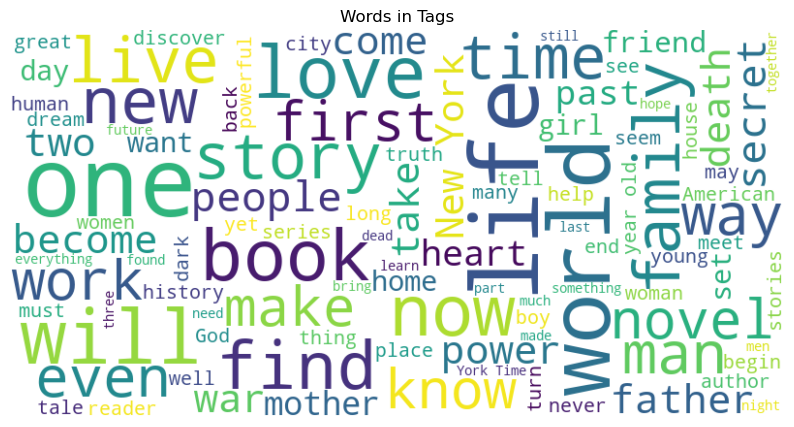

In [53]:
wc_context= wc.generate(df['tags'].str.cat(sep = " "))
plt.figure(figsize=(10, 6))
plt.imshow(wc_context, interpolation='bilinear')
plt.axis('off')
plt.title('Words in Tags')
plt.show()

## Building content-based book recommender system

### Vectorization

**TF-IDF Vectorizer**

Term frequency Inverse document frequency (TFIDF) is a statistical formula to convert text documents into vectors based on the relevancy of the word. It is based on the bag of the words model to create a matrix containing the information about less relevant and most relevant words in the document.

In [54]:
# Vectorize the combined features
vectorizer = TfidfVectorizer(stop_words='english')
feature_matrix = vectorizer.fit_transform(df['tags'])

# Calculate cosine similarity
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

In [55]:
# Viewing similarity scores 

print(cosine_sim)

[[1.         0.41951198 0.26565313 ... 0.         0.00752729 0.00419778]
 [0.41951198 1.         0.32576713 ... 0.00711416 0.00685901 0.02483381]
 [0.26565313 0.32576713 1.         ... 0.00106635 0.00591538 0.00982766]
 ...
 [0.         0.00711416 0.00106635 ... 1.         0.00986411 0.04101104]
 [0.00752729 0.00685901 0.00591538 ... 0.00986411 1.         0.02894586]
 [0.00419778 0.02483381 0.00982766 ... 0.04101104 0.02894586 1.        ]]


In [56]:
scores_df = pd.DataFrame(cosine_sim)
scores_df

,0,1,2,3,4,5,6,7,8,9,...,14401,14402,14403,14404,14405,14406,14407,14408,14409,14410
0,1.000000,0.419512,0.265653,0.420394,0.356971,0.332010,0.249722,0.006469,0.007777,0.020106,...,0.016558,0.016506,0.017792,0.022233,0.013440,0.000330,0.003275,0.000000,0.007527,0.004198
1,0.419512,1.000000,0.325767,0.646841,0.568556,0.392411,0.350593,0.002993,0.005416,0.011414,...,0.021482,0.049950,0.013253,0.018330,0.007356,0.010423,0.011020,0.007114,0.006859,0.024834
2,0.265653,0.325767,1.000000,0.320535,0.323266,0.423782,0.206735,0.007199,0.005886,0.018391,...,0.010497,0.008180,0.007421,0.020128,0.010562,0.012810,0.002079,0.001066,0.005915,0.009828
3,0.420394,0.646841,0.320535,1.000000,0.545722,0.409220,0.367721,0.004806,0.010613,0.006550,...,0.018479,0.032791,0.007807,0.012265,0.011113,0.009723,0.000607,0.000000,0.006224,0.000000
4,0.356971,0.568556,0.323266,0.545722,1.000000,0.404730,0.329438,0.005248,0.010885,0.007153,...,0.010967,0.038167,0.008525,0.006308,0.012134,0.006461,0.002399,0.000000,0.017966,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14406,0.000330,0.010423,0.012810,0.009723,0.006461,0.000385,0.004944,0.000262,0.007030,0.003217,...,0.035557,0.007055,0.000000,0.017815,0.017274,1.000000,0.159424,0.014289,0.009429,0.005565
14407,0.003275,0.011020,0.002079,0.000607,0.002399,0.004105,0.008401,0.023193,0.004565,0.013298,...,0.038846,0.009880,0.009164,0.008340,0.017411,0.159424,1.000000,0.004655,0.012549,0.013946
14408,0.000000,0.007114,0.001066,0.000000,0.000000,0.000000,0.000000,0.000000,0.005582,0.002959,...,0.010365,0.000000,0.006870,0.005186,0.002305,0.014289,0.004655,1.000000,0.009864,0.041011
14409,0.007527,0.006859,0.005915,0.006224,0.017966,0.005289,0.011859,0.010438,0.006079,0.000000,...,0.013243,0.028977,0.015896,0.021367,0.024826,0.009429,0.012549,0.009864,1.000000,0.028946


### Defining a content-based recommendation function

In [60]:
def content_based_recommendations(book_title, cosine_sim=cosine_sim):
    idx = df[df['title'] == book_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    sim_scores = sim_scores[1:6]  # Get top 5 similar books
    book_indices = [i[0] for i in sim_scores]
    
    return df['title'].iloc[book_indices]

### Suggestions

In [61]:
content_based_recommendations('Harry Potter and the Half-Blood Prince')

1363      Harry Potter and the Chamber of Secrets
3        Harry Potter and the Prisoner of Azkaban
1       Harry Potter and the Order of the Phoenix
4             Harry Potter and the Goblet of Fire
5               Harry Potter Boxed Set, Books 1-5
Name: title, dtype: object

In [62]:
content_based_recommendations('Neither Here nor There: Travels in Europe')

12       The Lost Continent: Travels in Small-Town America
7126                                       Made in America
15       The Mother Tongue: English and How It Got That...
12572    The Road to Little Dribbling: Adventures of an...
906              The Life and Times of the Thunderbolt Kid
Name: title, dtype: object

In [63]:
content_based_recommendations('The Long Secret')

5411              Harriet the Spy
10117    The Blood of the Vampire
9469      A Game Of Hide And Seek
4637             Wolf by the Ears
3875                  Gaudy Night
Name: title, dtype: object

<h1><center><b><td>Popularity Based Filtering</td></b></center></h1>

Popularity-based filtering is a simple and intuitive approach to recommend items to users based on their popularity or popularity-related metrics. Instead of analyzing user preferences or item similarities, popularity-based filtering suggests items that are generally popular or highly rated by a large number of users.

It is particularly useful in scenarios where there is limited user data or for new users who do not have a history of interactions. It provides a starting point for recommendations.

Here, With the help of Popularity-based filtering, Top N books can be recommended to users based on maximum number of ratings and average rating given to each book.

In [64]:
df.head(2)

,book_id,image_url,title,description,author,genre,num_ratings,average_rating,tags
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"[It, is, the, middle, of, the, summer,, but, t...",[J.K.Rowling],"[Fantasy, YoungAdult, Fiction, Magic, Children...",3292516,4.58,"It is the middle of the summer, but there is a..."
1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,"[Harry, Potter, is, about, to, start, his, fif...",[J.K.Rowling],"[YoungAdult, Fiction, Magic, Childrens, Audiob...",3401709,4.50,Harry Potter is about to start his fifth year ...


#### Defining Popularity Score

Popularity score can be built by multipling the number of ratings by the average rating. This technique aims to capture both the quantity (number of ratings) and the quality (average rating) of interactions or feedback received by an item.

In [65]:
# Calculating popularity score

df['popularity_score'] = df['num_ratings'] * df['average_rating']

#### Normalizing the popularity score 

Normalization typically involves scaling the scores to a range between 0 and 1. This is an important step to ensure that the scores from different components (content-based similarity and popularity) are on a comparable scale. 

In [66]:
# Normalize the popularity score

df['popularity_score_normalized'] = (df['popularity_score'] - df['popularity_score'].min()) / (df['popularity_score'].max() - df['popularity_score'].min())


In [67]:
df.head(2)

,book_id,image_url,title,description,author,genre,num_ratings,average_rating,tags,popularity_score,popularity_score_normalized
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"[It, is, the, middle, of, the, summer,, but, t...",[J.K.Rowling],"[Fantasy, YoungAdult, Fiction, Magic, Children...",3292516,4.58,"It is the middle of the summer, but there is a...",15079723.28,0.333477
1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,"[Harry, Potter, is, about, to, start, his, fif...",[J.K.Rowling],"[YoungAdult, Fiction, Magic, Childrens, Audiob...",3401709,4.50,Harry Potter is about to start his fifth year ...,15307690.50,0.338519


### Defining a popularity-based recommendation function

In [68]:
# Function to get top N popular books

def get_popular_books(N):
    # Sort books by normalized popularity score
    popular_books = df.sort_values(by='popularity_score_normalized', ascending=False)
    
    return popular_books.head(N)

### Suggestions

In [69]:
# Get top 10 popular books

top_10_popular_books = get_popular_books(10)
print(top_10_popular_books[['title']])

                                          title
2         Harry Potter and the Sorcerer's Stone
13490     Harry Potter and the Sorcerer’s Stone
8886                           The Hunger Games
218                       To Kill a Mockingbird
2504                                   Twilight
11108                    The Fault in Our Stars
373                            The Great Gatsby
488                                        1984
3      Harry Potter and the Prisoner of Azkaban
163                         Pride and Prejudice


<h1><center><b><td>Hybrid Recommender System</td></b></center></h1>

It involves combining both content-based and popularity-based filtering approaches to leverage the strengths of both methods. This can be done by assigning weights to the recommendations from both content-based and popularity-based filtering methods and combine them.

This is suitable for users who fall between these two extremes—those who have some preferences, but not enough to rely solely on content-based recommendations. Such Users who want to explore new genres or categories that they haven't interacted with before and want to stay updated with trending and popular items.

### Building a hybrid (content-popularity) recommender system

In [72]:
# Function to get hybrid recommendations

def hybrid_recommendations(book_title, content_weight=0.8, popularity_weight=0.2, N=10):
    # Ensure the weights sum to 1
    if content_weight + popularity_weight != 1:
        raise ValueError("Content weight and popularity weight must sum to 1.")
    
    # Get content-based recommendations
    idx = df[df['title'] == book_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores_df = pd.DataFrame(sim_scores, columns=['book_idx', 'similarity_score'])
    
    # Merge with the books DataFrame to get the normalized popularity scores
    sim_scores_df = sim_scores_df.merge(df[['book_id', 'popularity_score_normalized']], left_on='book_idx', right_index=True)
    
    # Calculate the hybrid score
    sim_scores_df['hybrid_score'] = (sim_scores_df['similarity_score'] * content_weight) + (sim_scores_df['popularity_score_normalized'] * popularity_weight)
    
    # Sort the books based on the hybrid score
    sim_scores_df = sim_scores_df.sort_values(by='hybrid_score', ascending=False)
    
    # Get the top N book indices (excluding the first one which is the book itself)
    top_n_indices = sim_scores_df['book_idx'].iloc[1:N+1]
    
    # Return the top N book titles
    return df['title'].iloc[top_n_indices]



### Suggestions

In [73]:
# Top 10 suggestions

print(hybrid_recommendations('The Hunger Games'))

9817                             Catching Fire
10358                               Mockingjay
13490    Harry Potter and the Sorcerer’s Stone
2        Harry Potter and the Sorcerer's Stone
218                      To Kill a Mockingbird
10532          The Hunger Games Trilogy Boxset
2504                                  Twilight
11324                                Divergent
488                                       1984
11108                   The Fault in Our Stars
Name: title, dtype: object


In [74]:
print(hybrid_recommendations('The Long Secret'))

5411                           Harriet the Spy
2        Harry Potter and the Sorcerer's Stone
10117                 The Blood of the Vampire
13490    Harry Potter and the Sorcerer’s Stone
9469                   A Game Of Hide And Seek
8886                          The Hunger Games
4637                          Wolf by the Ears
3875                               Gaudy Night
14204                              Happy Place
7736                                     Angel
Name: title, dtype: object


### Saving files

In [75]:
import pickle

In [76]:
pickle.dump(df, open('books_data.pkl', 'wb'))
pickle.dump(cosine_sim, open('cosine_sim.pkl', 'wb'))